In [1]:
import xarray as xr
import xesmf
import os
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt

# Data at https://atmos.washington.edu/~nicway/data/ (2.8 and 4.2 MB)
data_dir =  # Where you download the files
os.chdir(data_dir)

ds_in = xr.open_dataset('ds_in_small.nc')
ds_in

ds_target = xr.open_dataset('ds_target.nc')
ds_target

# Uncomment to remove singularities
ds_in = ds_in.isel(ni=slice(1,359), nj=slice(1,199), ni_b=slice(1,360), nj_b=slice(1,200))
ds_target = ds_target.isel(ni=slice(1,359), nj=slice(1,199), ni_b=slice(1,360), nj_b=slice(1,200))

regridder = xesmf.Regridder(ds_in, ds_target, 'bilinear')
sic_bilinear = regridder(ds_in.sic)

regridder = xesmf.Regridder(ds_in, ds_target, 'conservative')
sic_conservative = regridder(ds_in.sic)

Overwrite existing file: bilinear_198x358_198x358.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: conservative_198x358_198x358.nc 
 You can set reuse_weights=True to save computing time.


/home/disk/sipn/nicway/anaconda3/envs/xesmf/lib/python3.6/site-packages/xarray/plot/utils.py:51: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  converter.register()


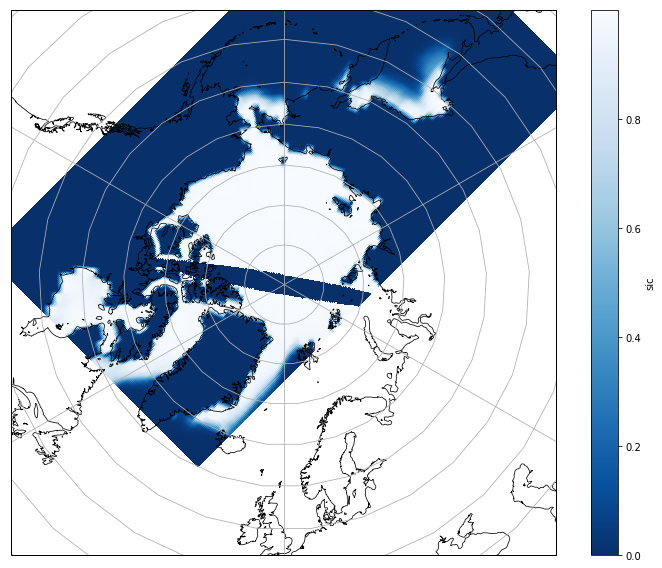

In [2]:
# Plot SIC on target projection
plt.figure(figsize=(10,8));
ax1 = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
sic_bilinear.plot.pcolormesh(ax=ax1, x='lon', y='lat', 
                                     transform=ccrs.PlateCarree(), cmap='Blues_r')
ax1.coastlines(linewidth=0.75, color='black', resolution='50m')
ax1.gridlines(crs=ccrs.PlateCarree(), linestyle='-')
ax1.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
plt.tight_layout()

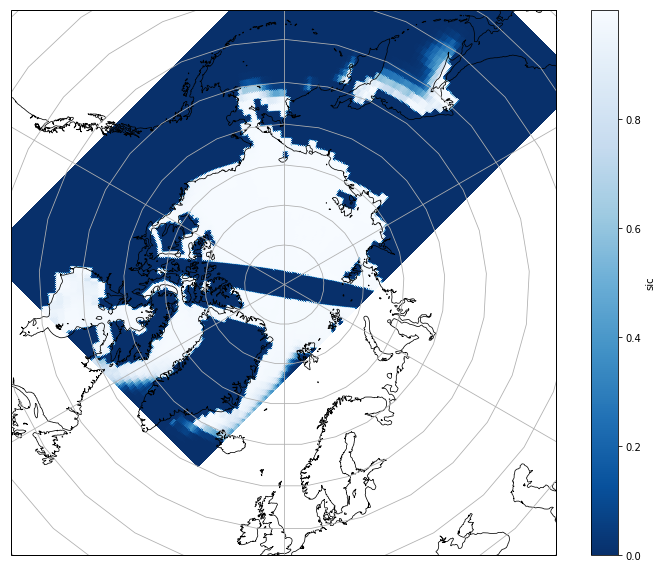

In [3]:
# Plot SIC on target projection
plt.figure(figsize=(10,8));
ax1 = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
sic_conservative.plot.pcolormesh(ax=ax1, x='lon', y='lat', 
                                     transform=ccrs.PlateCarree(), cmap='Blues_r')
ax1.coastlines(linewidth=0.75, color='black', resolution='50m')
ax1.gridlines(crs=ccrs.PlateCarree(), linestyle='-')
ax1.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
plt.tight_layout()